### ASSIGNMENT 1 : 
Prediksi Potensi Penyakit Jantung Menggunakan Algoritma ANN

- Goal : Menguji arsitektur yang serupa dengan tuning hyperparameter batch size dan jumlah epoch

Author : Karimah

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import warnings
import seaborn as sns
#from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [2]:
plt.style.use('seaborn')

Diketahui data kondisi tubuh serta potensi penyakit jantung dari 303 responden sebagai berikut : 

In [3]:
df = pd.DataFrame(pd.read_csv('./heart_disease.txt', sep= ','))
len(df)

303

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Complete attribute documentation:
      
      
      3 age: age in years
      4 sex: sex (1 = male; 0 = female)
      9 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
     10 trestbps: resting blood pressure (in mm Hg on admission to the 
        hospital)
     12 chol: serum cholestoral in mg/dl
     16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
     19 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
     32 thalach: maximum heart rate achieved
     38 exang: exercise induced angina (1 = yes; 0 = no)
     40 oldpeak = ST depression induced by exercise relative to rest
     41 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
     44 ca: number of major vessels (0-3) colored by flourosopy

     51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
     58 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1,2,3,4: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)

# CLEANING DATA

Tipe variabel :
- Binary: sex, fbs, exang
- Categorical: cp, restecg, slope, ca, thal, num(target)
- Continuous: age, trestbps, chol, thalac, oldpeak


1. Menghapus baris dengan objek tidak dikenal

In [5]:
xx=np.where(df=='?')
xx

(array([ 87, 166, 192, 266, 287, 302], dtype=int64),
 array([12, 11, 11, 12, 11, 11], dtype=int64))

for i in range(0,len(xx[0])):
    row = xx[0][i]
    col = xx[1][i]
    df.iloc[row,col] = np.NaN

In [6]:
df=df.drop(xx[0],axis=0)

In [7]:
len(df)

297

2. Mengubah kolom binary dan categorical ke integer

In [8]:
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
num           5
dtype: int64

In [9]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [10]:
#Change float to int
for i in ['sex','fbs','exang','cp','restecg','slope']:
    df[i]=df[i].astype(int)

In [11]:
#change object to int
df['ca']=df['ca'].astype(float).astype(int)
df['thal']=df['thal'].astype(float).astype(int)

In [12]:
df.dtypes

age         float64
sex           int32
cp            int32
trestbps    float64
chol        float64
fbs           int32
restecg       int32
thalach     float64
exang         int32
oldpeak     float64
slope         int32
ca            int32
thal          int32
num           int64
dtype: object

In [13]:
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
num           5
dtype: int64

3. Cek duplikat

In [14]:
#check for duplicate rows
duplicates = df.duplicated().sum()
duplicates

0

In [15]:
all(df.isnull()==False)

True

# EXPLORATORY DATA ANALYSIS


Distribusi tiap atribut sebagai berikut :

<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

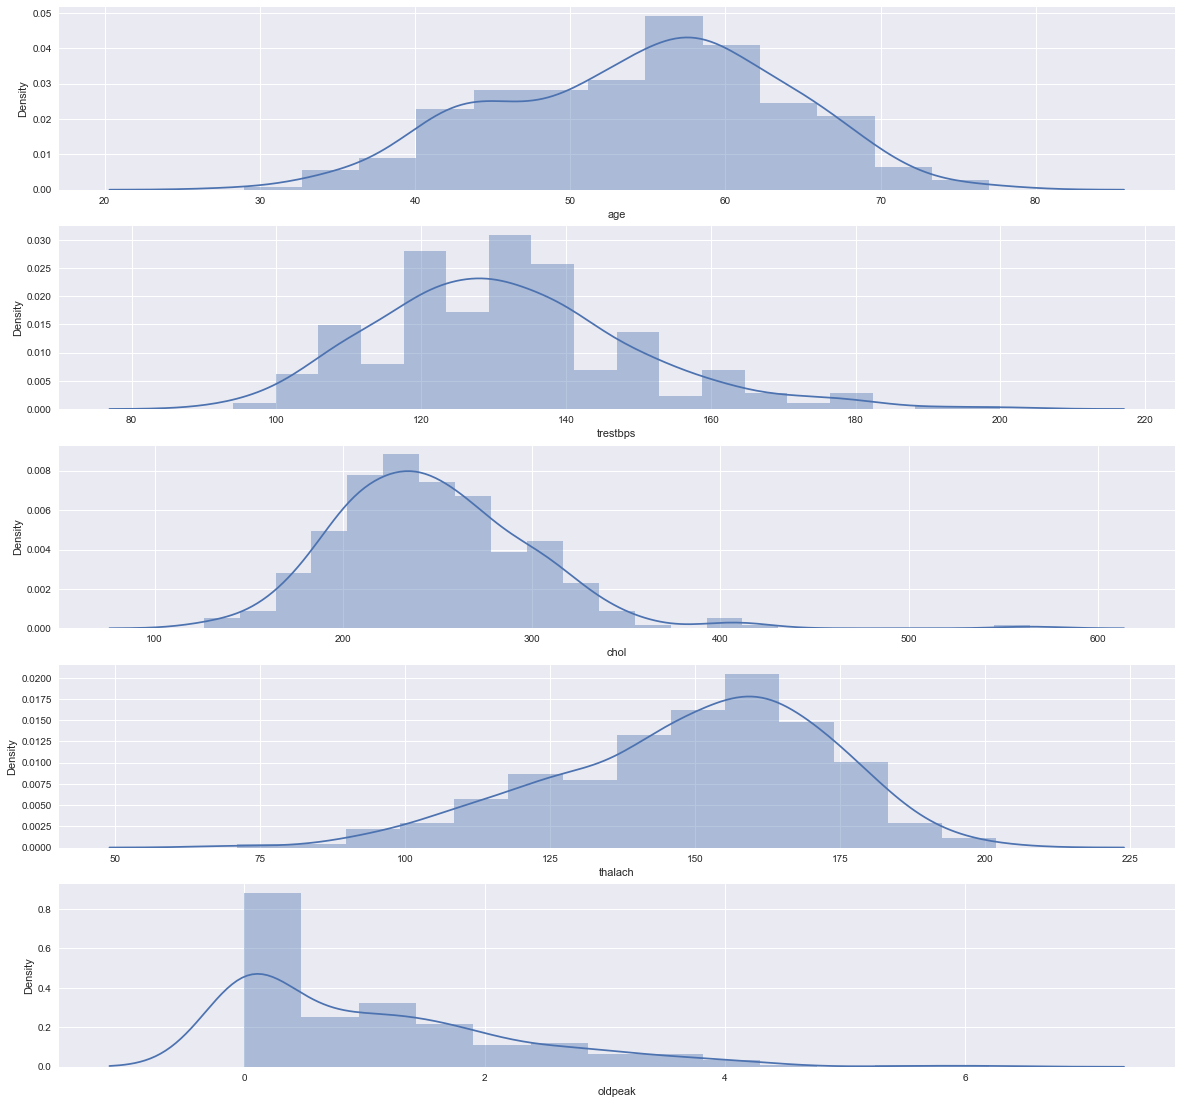

In [16]:
#distribusi atribut kontinyu
warnings.filterwarnings('ignore')
nums = df
plt.figure(figsize=(20,80))
#for i, column in enumerate([nums.columns]):
plt.subplot(20, 1, 1); sns.distplot(nums['age'])
plt.subplot(20, 1, 2); sns.distplot(nums['trestbps'])
plt.subplot(20, 1, 3); sns.distplot(nums['chol'])
plt.subplot(20, 1, 4); sns.distplot(nums['thalach'])
plt.subplot(20, 1, 5); sns.distplot(nums['oldpeak'])

Persentase jumlah data tiap kategori kolom yang menyatakan diagnosis ('num') sebagai berikut :

[Text(0, 0.5, 'Percent')]

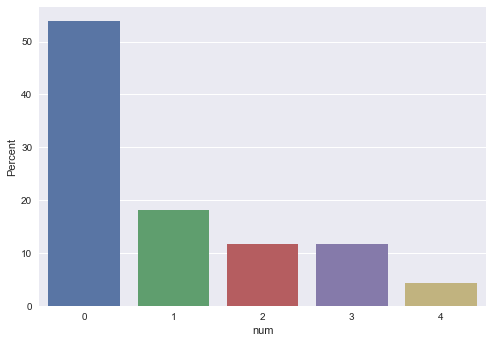

In [17]:
ax = sns.barplot(x='num', y="num", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Untuk menyederhanakan klasifikasi dan membuat data balance, kategori 1, 2, 3, dan 4 akan disatukan sebagai 2 kategori pada kolom "potential" (nilai 0 untuk kondisi tidak berpotensi dan 1 untuk kondisi berpotensi penyakit jantung)

In [18]:
potential = []
for i in df.num:
    if i==0:
        potential.append(0)
    else:
        potential.append(1)
df['potential'] = potential

[Text(0, 0.5, 'Percent')]

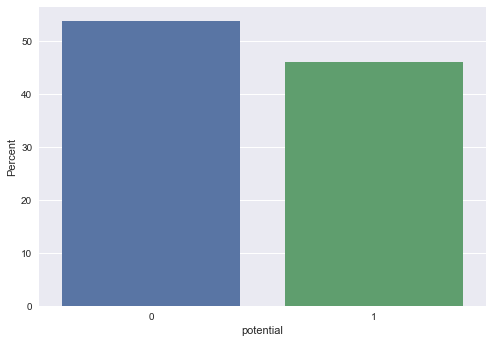

In [19]:
ax = sns.barplot(x='potential', y="potential", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Data potential sudah cukup seimbang antara yang berpotensi dan yang tidak berpotensi.
Sekarang akan lanjut analisis tiap feature

Selanjutnya, akan dilihat korelasi linier dari tiap atribut.

<AxesSubplot:>

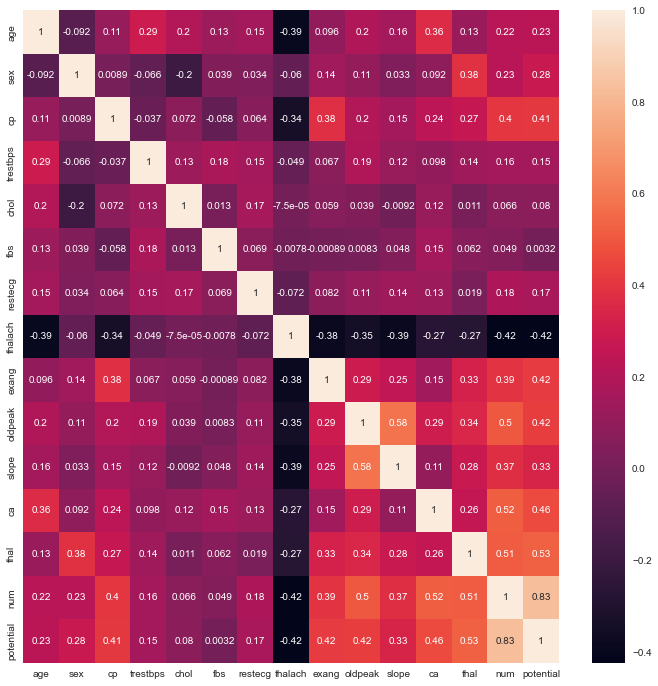

In [20]:
### LINEAR CORRELATION
plt.figure(figsize=(12,12))
linearCorr = df.corr()
sns.heatmap(linearCorr, annot=True)

Tidak ada atribut yg saling berkolerasi secara linier dengan "potential", sehingga problem ini tidak dapat menggunakan algoritma regresi linier. Selanjutnya diperlukan pemilihan atribut-atribut yang penting/berpengaruh untuk prediksi dengan menggunakan algoritma deep learning.

Membuat df_pred, yaitu dataframe untuk menyimpan semua atribut

In [21]:
df_pred=df.drop(['num','potential'], axis=1)

Plot bar chart untuk melihat perbandingan distribusi tiap kategori berdasarkan target ('potential')

[Text(17.200000000000003, 0.5, 'Percent')]

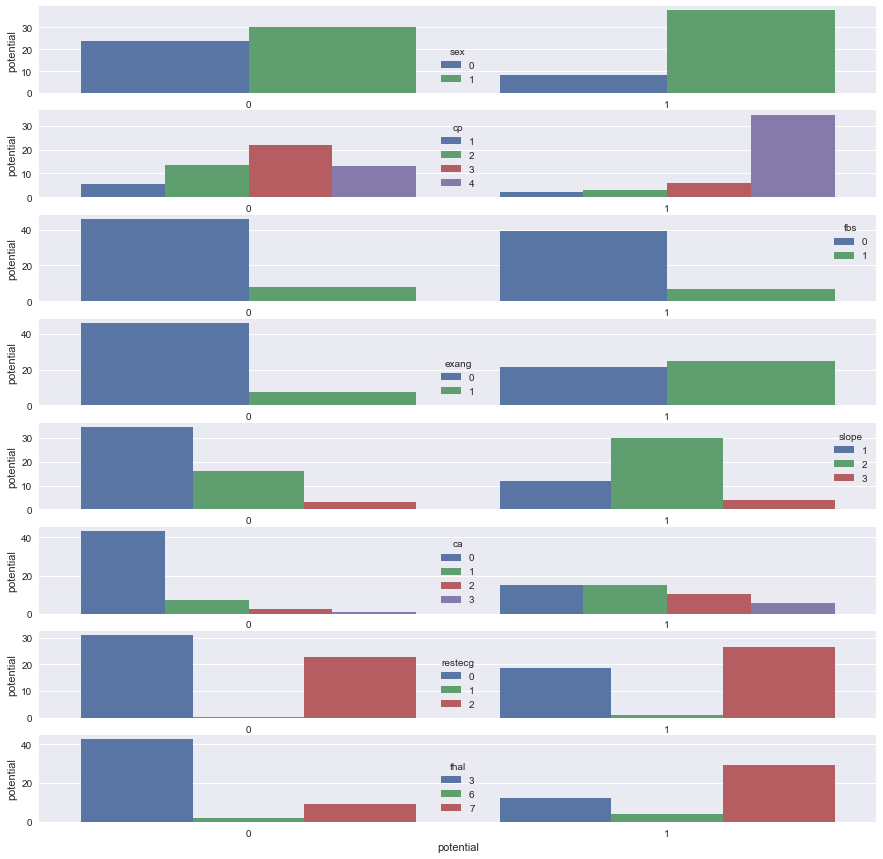

In [22]:
plt.figure(figsize=(15,15))
plt.subplot(8, 1, 1); sns.barplot(x='potential', y="potential", data=df, hue='sex', estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.subplot(8, 1, 2); sns.barplot(x='potential', y="potential", data=df, hue='cp', estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.subplot(8, 1, 3); sns.barplot(x='potential', y="potential", data=df, hue='fbs', estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.subplot(8, 1, 4); sns.barplot(x='potential', y="potential", data=df, hue='exang', estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.subplot(8, 1, 5); sns.barplot(x='potential', y="potential", data=df, hue='slope', estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.subplot(8, 1, 6); sns.barplot(x='potential', y="potential", data=df, hue='ca', estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.subplot(8, 1, 7); sns.barplot(x='potential', y="potential", data=df, hue='restecg', estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.subplot(8, 1, 8); sns.barplot(x='potential', y="potential", data=df, hue='thal', estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Atribut fbs dan restecg menunjukkan distribusi yang mirip, baik di kategori berpotensi/tidak, maka atribut dapat diabaikan dan sisa atribut dijadikan sebagai fitur prediktor

In [23]:
df_pred = df_pred.drop(['fbs','restecg'],axis=1)

# TRAINING DATA

### PREPROCESSING : 

In [24]:
from sklearn.model_selection import train_test_split

#1. to categorical target output - y
y = to_categorical(df.potential)
#2. normalize features - X
X = (df_pred - np.min(df_pred)) / (np.max(df_pred) - np.min(df_pred)).values

#3. split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### ARSITEKTUR :

- Jumlah Hidden Layer : 2 
    - Neuron hidden layer 1 : 50 
    - Neuron hidden layer 2 : 30
- Fungsi Aktivasi : Sigmoid (untuk semua layer)
- Fungsi Optimasi : SGD

In [25]:
# fit a model and plot learning curve function
def fit_model(trainX, trainy, validX, validy, n_batch, n_epoch):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=11, activation='sigmoid', kernel_initializer='he_uniform'))
    model.add(Dense(30, activation='sigmoid', kernel_initializer='he_uniform'))
    model.add(Dense(2, activation='sigmoid'))

    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=n_epoch, verbose=0, batch_size=n_batch)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch='+str(n_batch))
    plt.legend()
      
    # evaluate the model
    _, train_acc = model.evaluate(X_train, y_train, verbose=0)
    _, valid_acc = model.evaluate(X_test, y_test, verbose=0)
    print('Batch=%.3f, Epoch=%.3f showed accuracy of Train: %.3f, Valid: %.3f' % (int(n_batch), int(n_epoch), train_acc, valid_acc))


## Training Model 1
- Batch Size = 4
- Epoch = 50,100,200 

Batch=4.000, Epoch=50.000 showed accuracy of Train: 0.855, Valid: 0.789
Batch=4.000, Epoch=100.000 showed accuracy of Train: 0.865, Valid: 0.856
Batch=4.000, Epoch=200.000 showed accuracy of Train: 0.874, Valid: 0.833
Batch=4.000, Epoch=300.000 showed accuracy of Train: 0.884, Valid: 0.822


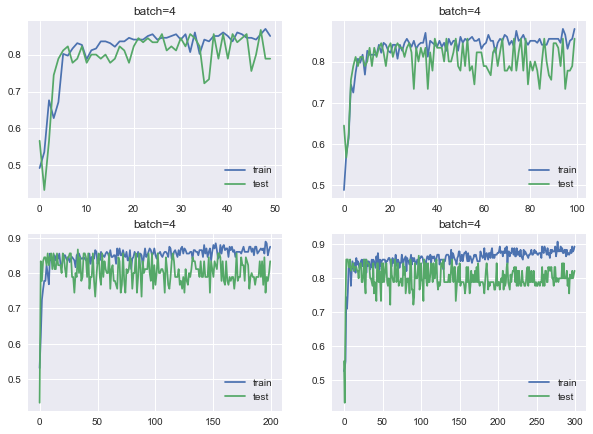

In [26]:
# create learning curves for different batch sizes
batch_sizes = [4]
epoch_iter = [50,100,200,300]
plt.figure(figsize=(10, 15))

for i in range(len(epoch_iter)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a batch size
    fit_model(X_train, y_train, X_test, y_test, batch_sizes[0],epoch_iter[i])
  
# show learning curves
plt.show()

Semakin besar jumlah epoch, training dengan batch=4 menunjukkan hasil akurasi data train yang semakin baik. Walaupun demikian, akurasi data validasi menunjukkan hasil yang fluktuatif di tiap iterasi. Kemungkinan akurasi puncak untuk data validasi ada pada epoch<=50.

## Training Model 2
- Batch Size = 32
- Epoch = 50,100,200,300 

Batch=32.000, Epoch=50.000 showed accuracy of Train: 0.826, Valid: 0.822
Batch=32.000, Epoch=100.000 showed accuracy of Train: 0.836, Valid: 0.811
Batch=32.000, Epoch=200.000 showed accuracy of Train: 0.841, Valid: 0.833
Batch=32.000, Epoch=300.000 showed accuracy of Train: 0.865, Valid: 0.856


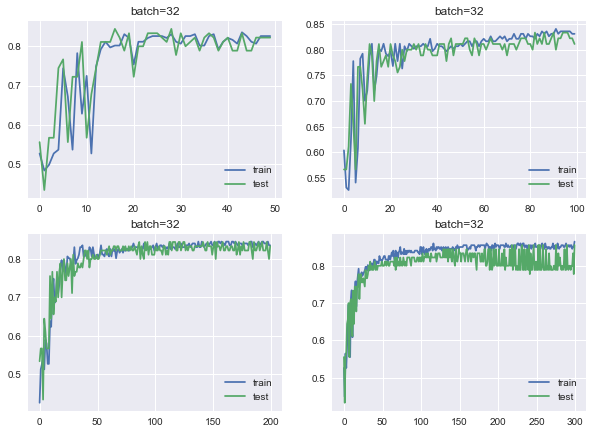

In [27]:
# create learning curves for different batch sizes
batch_sizes = [32]
epoch_iter = [50,100,200,300]
plt.figure(figsize=(10, 15))

for i in range(len(epoch_iter)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a batch size
    fit_model(X_train, y_train, X_test, y_test, batch_sizes[0],epoch_iter[i])
  
# show learning curves
plt.show()

Sama seperti sebelumnya, hasil akurasi data train menggunakan batch=32 juga menunjukkan hasil yang kerap membaik. Namun semakin besar epoch (lihat grafik di epoch menuju 300) menunjukkan hasil prediksi data validasi yang semakin lebih rendah dari akurasi data train. Kemungkinan puncak akurasi untuk data validasi ada di epoch<=200.

## Training Model 3
- Batch Size = 64
- Epoch = 50,100,200,300 

Batch=64.000, Epoch=50.000 showed accuracy of Train: 0.792, Valid: 0.778
Batch=64.000, Epoch=100.000 showed accuracy of Train: 0.836, Valid: 0.833
Batch=64.000, Epoch=200.000 showed accuracy of Train: 0.841, Valid: 0.811
Batch=64.000, Epoch=300.000 showed accuracy of Train: 0.841, Valid: 0.822


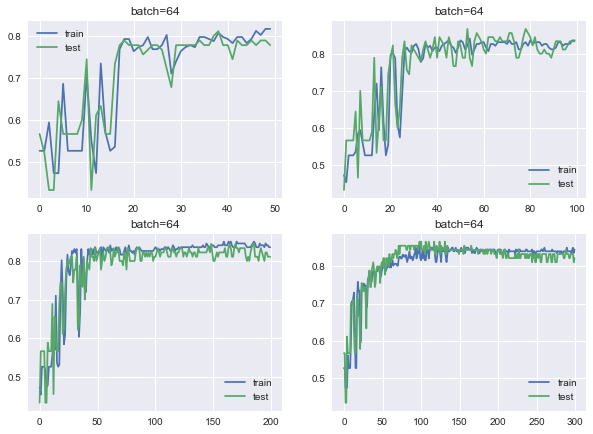

In [28]:
# create learning curves for different batch sizes
batch_sizes = [64]
epoch_iter = [50,100,200,300]
plt.figure(figsize=(10, 15))

for i in range(len(epoch_iter)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a batch size
    fit_model(X_train, y_train, X_test, y_test, batch_sizes[0],epoch_iter[i])
  
# show learning curves
plt.show()

Training menggunakan batch=64 menunjukkan hasil akurasi data train dan test yang paling stabil dibanding jumlah batch yang sebelumnya telah dicoba. Kestabilan akurasi mulai terlihat sejak iterasi ke-50.

--------------------------------- THANK YOU ---------------------------------